About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's work with data about students.

In [2]:
df = pd.read_csv('students_hw3.csv')

df.sample(4)

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
503,504,16.0,3,0,1,1,17,5,19,No,No,f,1.647440,82.090463,30.246374,brown,0.004433,NaN,Algebra
749,750,88.0,9,4,9,4,5,6,18,Yes,No,m,1.691488,72.781736,25.438104,gray,0.004338,NaN,Drama
279,280,30.0,4,7,7,3,10,4,20,No,No,m,1.749951,69.425187,22.670715,green,0.003922,PE,Art
451,452,13.0,4,0,1,1,14,8,16,Yes,No,f,1.649948,49.519270,18.190040,green,0.002830,Art,Biology


We will predict their performance index.

In [6]:
X = df.drop('Performance Index', axis = 1)
y = df['Performance Index']

# Task 1 (2 points)

Let's try to propose hypothesis, which features will be the most useful.

For every feature $x^j$:

*   Draw a plot of $x^j$ and target (scatter plot, if feature is numerical and boxplot if the feature is categorical)
*   Compute correlation of  $x^j$ and target if the feature is numerical.



Draw conclusions: which features seems to be the most important? Which does not seem useful? Does it seems logical?

In [7]:
numerical= X.select_dtypes(include=[np.number]).columns
categorical= X.select_dtypes(exclude=[np.number]).columns

In [9]:
len(X.columns)

18

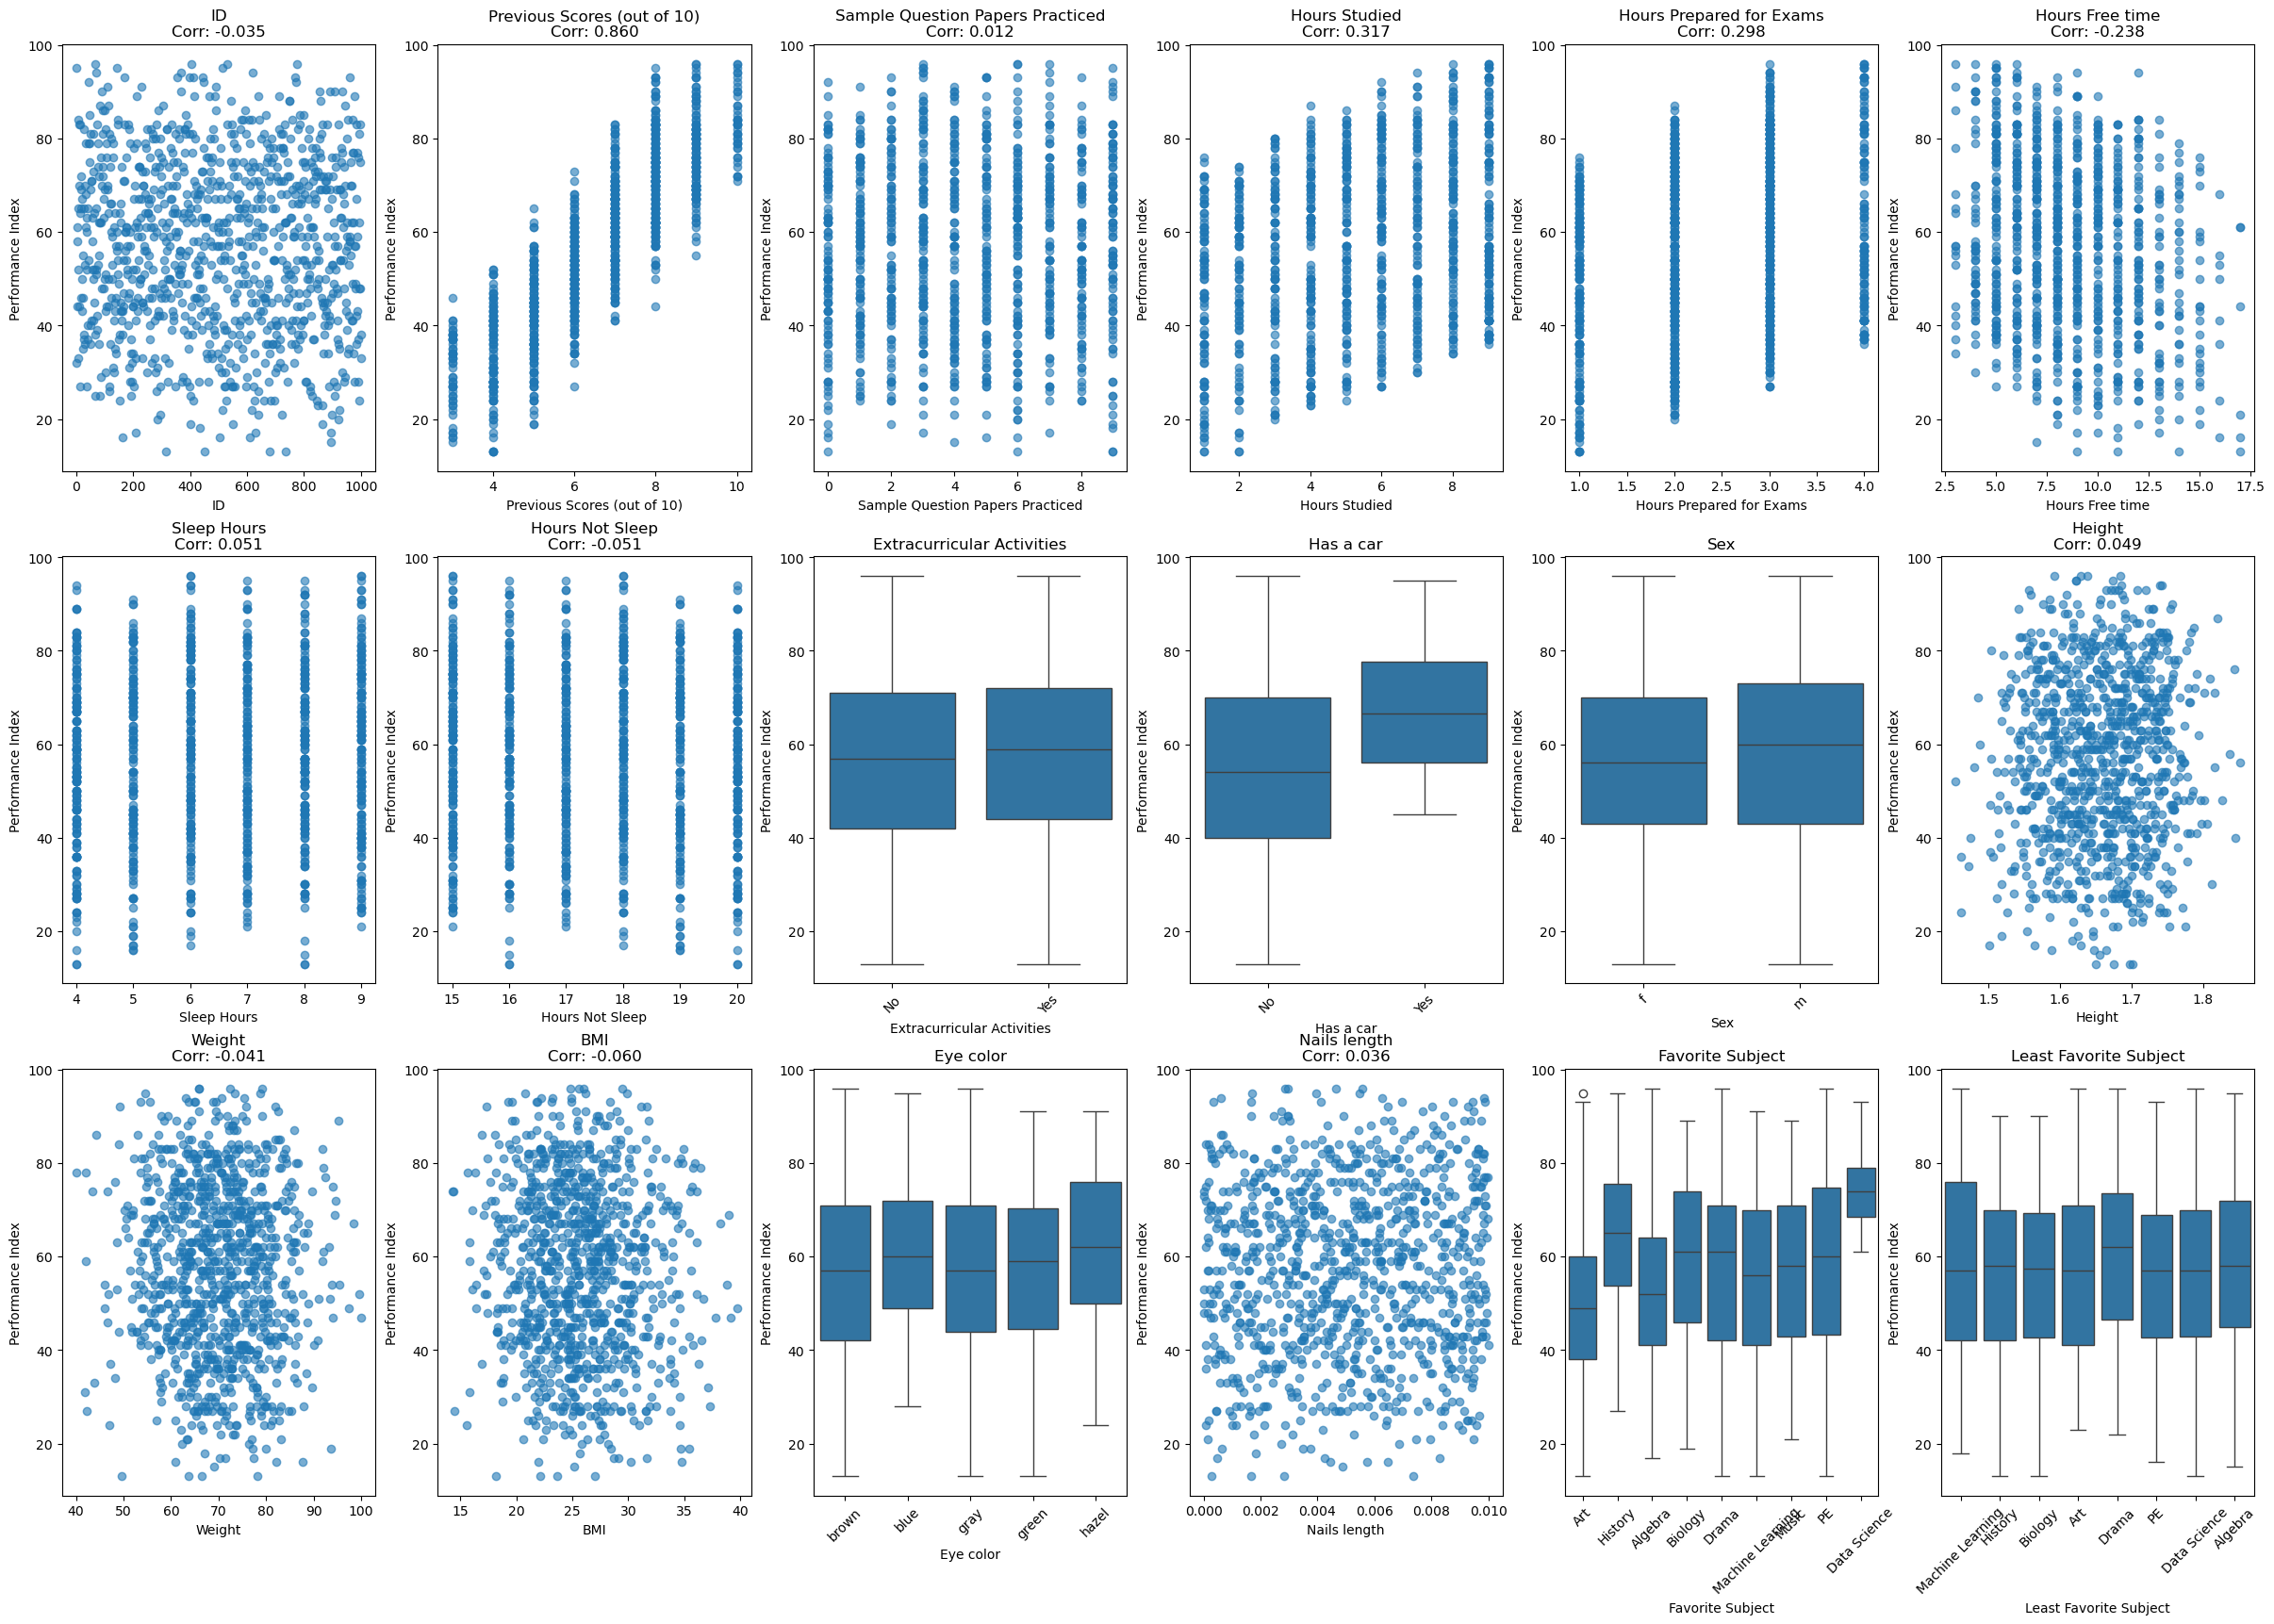

In [13]:

fig, axes= plt.subplots(3, 6, figsize=(30, 20))
axes= axes.flatten()

for i, col in enumerate(X.columns):
    if col in numerical:
        axes[i].scatter(X[col], y, alpha=0.6)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Performance Index')
        corr = X[col].corr(y)
        axes[i].set_title(f'{col}\nCorr: {corr:.3f}')
    else:
        X_temp = X.copy()
        X_temp['Performance Index'] = y
        sns.boxplot(data=X_temp, x=col, y='Performance Index', ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_title(col)

In [15]:
for col in numerical:
    corr = X[col].corr(y)
    print(f"{col}: {corr: .3f}")

ID: -0.035
Previous Scores (out of 10):  0.860
Sample Question Papers Practiced:  0.012
Hours Studied:  0.317
Hours Prepared for Exams:  0.298
Hours Free time: -0.238
Sleep Hours:  0.051
Hours Not Sleep: -0.051
Height:  0.049
Weight: -0.041
BMI: -0.060
Nails length:  0.036


**Answer**: Observing the correlations with performance index, it seems like the most important feature is "Previous scores". \
Next -- "Hours studied" and "Hours prepared for exams". \
The weakest correlations -- Sample Question Papers Practiced, Sleep Hours, Hours Not Sleep, Height, Weight, BMI, Nails length. \
It seems absolutely logical, since Performance Index would likely be more connected with the studying progress rather than appearance or smth like that. 


# Task 2 (3 points)

Split data into train and test. Set `test_size=0.3, random_state=0`

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Preprocess the data:


*   Depict number of missing values in every column, replace missing values with median, computed on train data (numerical features) or with 'Not Given' (categorical features)
*   Encode the categorical with one-hot-encoder



In [18]:
values = {}

for col in numerical:
    values[col] = X_train[col].median()
for col in categorical:
    values[col] = 'Not Given'

X_test.fillna(values, inplace=True)
X_train.fillna(values, inplace=True)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_cat= ohe.fit_transform(X_train[categorical])
X_test_cat= ohe.transform(X_test[categorical])
X_train= pd.concat([X_train[numerical].reset_index(drop=True), 
                     pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(categorical))], axis=1)
X_test= pd.concat([X_test[numerical].reset_index(drop=True), 
                    pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(categorical))], axis=1)

Train linear regression without regularization, compute MSE on train and test data.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr= LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse= mean_squared_error(y_train, y_train_pred)
test_mse= mean_squared_error(y_test, y_test_pred)

print(f"Mean squared error, computed on train sample: {train_mse:.3f} and on the test sample is {test_mse:.3f}")

Mean squared error, computed on train sample: 31.805 and on the test sample is 38.841


# Task 3 (3 points)

Investigate the coefficients of the model. Why were they so big/small? Can the absolute value of the coefficitnt be used as a measure of importance of the feature? Why/why not?

In [25]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_,
    'Abs_Coefficient': np.abs(lr.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df)

                                    Feature  Coefficient  Abs_Coefficient
11                             Nails length    44.095203        44.095203
8                                    Height    10.638822        10.638822
1               Previous Scores (out of 10)     8.718033         8.718033
16                           Eye color_blue     3.045106         3.045106
3                             Hours Studied     2.755438         2.755438
23            Favorite Subject_Data Science     2.590931         2.590931
12           Extracurricular Activities_Yes     1.436996         1.436996
13                      Has a car_Not Given     1.380149         1.380149
15                                    Sex_m     1.313708         1.313708
34           Least Favorite Subject_History    -0.862792         0.862792
14                            Has a car_Yes     0.836841         0.836841
35  Least Favorite Subject_Machine Learning    -0.831426         0.831426
19                          Eye color_

**Answer**: The biggest coefficient refers to "Nails length". It happens due to the scale mismatch between this feature and the target variable. Same story with Height. These features have lower decimal values compared to the "performance Index", that is why small changes in these features need to be multiplied by larger coefficients. Therefore, the absolute value of the coefficient does not mean that the feature is important, when we are talking about features on different scales. 

Draw conclusions about the model and important features and explain if it is logical. If it could not be done right now, tackle the problem.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

lr_scaled= LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

importance= pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr_scaled.coef_)
}).sort_values('Importance', ascending=False)

print(importance.head(7))

train_mse = mean_squared_error(y_train, lr_scaled.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lr_scaled.predict(X_test_scaled))

print(f"Mean squared error, computed on train sample: {train_mse:.3f} and on the test sample is {test_mse:.3f}")

                        Feature    Importance
6                   Sleep Hours  1.198540e+14
7               Hours Not Sleep  1.198540e+14
1   Previous Scores (out of 10)  1.644918e+01
10                          BMI  7.432166e+00
9                        Weight  6.718792e+00
3                 Hours Studied  6.440270e+00
8                        Height  2.824629e+00
Mean squared error, computed on train sample: 32.589 and on the test sample is 39.980


**Answer**: Now it definitely makes sense. Previous scores and Hours studied seem to predict the Performance Index well, as far as they are connected with studying progress and results. 

# Task 3 (3 points)

For different `alpha` hyperparameter fit linear regression with $L_1$ regularization (`Lasso` model, if there are warnings - set `tol=0.1`).

Choose the grid in such way that the smallest alpha will result in 0-5 zero coefficent and for biggest - all coefficient will be 0.

For every model save number of zero coefficients and MSE on train and test data

In [23]:
from sklearn.linear_model import Lasso
alphas= np.logspace(-3, 2, 20)

results= []

for alpha in alphas:
    lasso= Lasso(alpha=alpha, tol=0.1)
    lasso.fit(X_train_scaled, y_train)
    
    zero_coefs= np.sum(lasso.coef_ == 0)
    
    train_mse= mean_squared_error(y_train, lasso.predict(X_train_scaled))
    test_mse= mean_squared_error(y_test, lasso.predict(X_test_scaled))
    
    results.append({
        'alpha': alpha,
        'zero_coefs': zero_coefs,
        'train_mse': train_mse,
        'test_mse': test_mse
    })
    
    print(f"Alpha: {alpha:.4f}, Zero coefs: {zero_coefs}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

results_df= pd.DataFrame(results)

Alpha: 0.0010, Zero coefs: 1, Train MSE: 31.8949, Test MSE: 38.7685
Alpha: 0.0018, Zero coefs: 0, Train MSE: 31.8957, Test MSE: 38.7640
Alpha: 0.0034, Zero coefs: 0, Train MSE: 31.8973, Test MSE: 38.7558
Alpha: 0.0062, Zero coefs: 1, Train MSE: 31.9007, Test MSE: 38.7412
Alpha: 0.0113, Zero coefs: 3, Train MSE: 31.9080, Test MSE: 38.7170
Alpha: 0.0207, Zero coefs: 6, Train MSE: 31.9229, Test MSE: 38.6465
Alpha: 0.0379, Zero coefs: 9, Train MSE: 31.9585, Test MSE: 38.5172
Alpha: 0.0695, Zero coefs: 10, Train MSE: 32.0548, Test MSE: 38.3181
Alpha: 0.1274, Zero coefs: 17, Train MSE: 32.3113, Test MSE: 38.0489
Alpha: 0.2336, Zero coefs: 23, Train MSE: 32.9441, Test MSE: 37.8195
Alpha: 0.4281, Zero coefs: 30, Train MSE: 33.9766, Test MSE: 37.9126
Alpha: 0.7848, Zero coefs: 35, Train MSE: 35.7793, Test MSE: 38.8971
Alpha: 1.4384, Zero coefs: 36, Train MSE: 39.0481, Test MSE: 41.8190
Alpha: 2.6367, Zero coefs: 36, Train MSE: 49.7586, Test MSE: 51.6531
Alpha: 4.8329, Zero coefs: 36, Train MSE:

Draw 2 plots near each other: plot of number of aero coefficients and plot of MSE (both train and test).  Draw conclusions: compare the MSE of Lasso and initial linear regression, which features are considered important in the best model, is it logical.

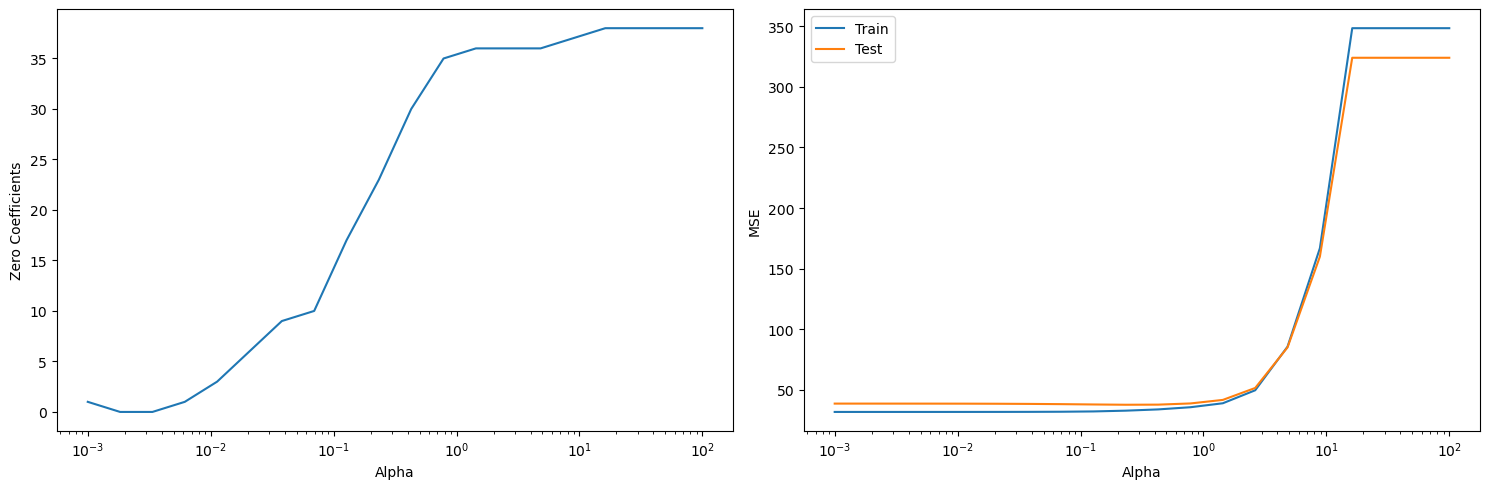

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(results_df['alpha'], results_df['zero_coefs'])
ax1.set_xlabel('Alpha'); ax1.set_ylabel('Zero Coefficients'); ax1.set_xscale('log')

ax2.plot(results_df['alpha'], results_df['train_mse'], label='Train')
ax2.plot(results_df['alpha'], results_df['test_mse'], label='Test')
ax2.set_xlabel('Alpha'); ax2.set_ylabel('MSE'); ax2.set_xscale('log'); ax2.legend()

plt.tight_layout(); plt.show()

In [28]:
best_idx= results_df['test_mse'].idxmin()
best_alpha= results_df.loc[best_idx, 'alpha']
print(f"Best alpha: {best_alpha:.3f}, Test MSE: {results_df.loc[best_idx, 'test_mse']:.3f}")
print(f"Original LR Test MSE: {mean_squared_error(y_test, lr_scaled.predict(X_test_scaled)):.3f}")

lasso_best= Lasso(alpha=best_alpha, tol=0.1).fit(X_train_scaled, y_train)
nonzero_features= pd.DataFrame({'Feature': X_train.columns, 'Coef': lasso_best.coef_})
print("Non-zero features:\n")
print(nonzero_features[nonzero_features['Coef'] != 0].sort_values('Coef', key=abs, ascending=False))

Best alpha: 0.234, Test MSE: 37.819
Original LR Test MSE: 39.980
Non-zero features:

                           Feature       Coef
1      Previous Scores (out of 10)  16.313479
3                    Hours Studied   6.881333
12  Extracurricular Activities_Yes   0.476609
16                  Eye color_blue   0.410649
23   Favorite Subject_Data Science   0.378848
6                      Sleep Hours   0.281003
5                  Hours Free time  -0.275688
13             Has a car_Not Given   0.205780
9                           Weight  -0.132126
14                   Has a car_Yes   0.089828
8                           Height  -0.072102
25        Favorite Subject_History   0.065361
19                 Eye color_green  -0.022060
18                  Eye color_gray   0.015904
4         Hours Prepared for Exams   0.005188


**Answer**: Lasso regularization achieved a test MSE (37.82) compared to the original linear regression's test MSE (38.84). Therefore, the Lasso model performs slightly better. The best Lasso model selected 15 features which are not zero. The selection seems logical since there are mostly academic factors outlined, and truly irrelevent features are ignored. 

# Task 4 (2 points)

Now, use $L_2$ regularization. Tune `Ridge` model hyperparameters using cross-validation. Report the best MSE.  

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.logspace(-12, 10, 50)}

ridge_cv = GridSearchCV(Ridge(), params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

best_ridge= ridge_cv.best_estimator_
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
best_mse= mean_squared_error(y_test, y_test_pred_ridge)

print(f"Best alpha: {ridge_cv.best_params_['alpha']:.3f}")
print(f"Best cross-validation MSE: {-ridge_cv.best_score_:.3f}")
print(f"Test MSE: {best_mse:.3f}")

Best alpha: 3.728
Best cross-validation MSE: 35.663
Test MSE: 38.860


Investigate coefficients: how many zeros? Which features are important?

In [34]:
ridge_coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Abs_Coefficient': np.abs(best_ridge.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Ridge Regression Coefficients:")
display(ridge_coefs)

zero_coefs = np.sum(ridge_coefs['Abs_Coefficient'] < 0.5)
print(f"\nNumber of zero coefficients: {zero_coefs}")

Ridge Regression Coefficients:


,Feature,Abs_Coefficient
1,Previous Scores (out of 10),16.342452
3,Hours Studied,6.603023
9,Weight,1.406867
10,BMI,1.157797
12,Extracurricular Activities_Yes,0.710721
15,Sex_m,0.641353
16,Eye color_blue,0.616650
23,Favorite Subject_Data Science,0.569892
4,Hours Prepared for Exams,0.507042
13,Has a car_Not Given,0.419320



Number of zero coefficients: 29


**Answer**: It seems like we have following 29 zero coefficients (close to zero). As for the important features, now we see Previous Scores and Hours studied (again), Weight and BMI.  